In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df = pd.read_csv('/content/BankChurners.csv')
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# Drop unnecessary columns like 'CLIENTNUM' and 'Naive_Bayes_Classifier...' columns
df.drop(columns=['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)


In [ ]:
# Check he null values
print("Number of null values:",df.isnull().sum())

# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Check the shape
print("Shape:", df.shape)

Number of null values: Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
Number of duplicate rows: 0
Shape: (10127, 20)


In [ ]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    print(df.head())

   Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               1            45      M                3     High School   
1               1            49      F                5        Graduate   
2               1            51      M                3        Graduate   
3               1            40      F                4     High School   
4               1            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3

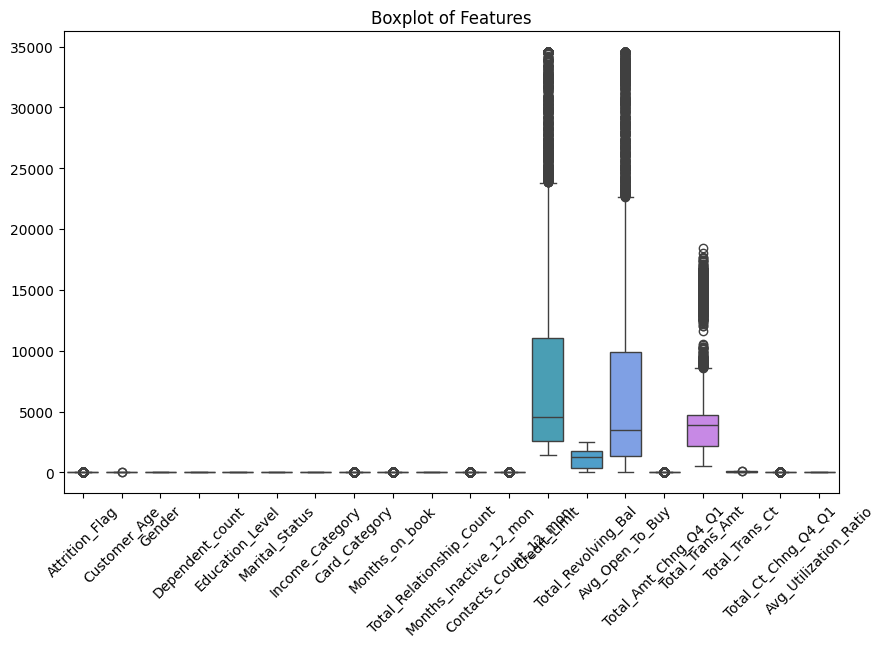

In [ ]:
# Check for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from scipy.stats import zscore

# Extract numerical columns for z-score calculation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate z-scores for numerical columns
z_scores = zscore(df[numerical_cols])

# Calculate absolute z-scores
abs_z_scores = np.abs(z_scores)

# Set the threshold for outliers
threshold = 3

# Create a mask for outliers
outliers_mask = (abs_z_scores > threshold).any(axis=1)

# Filter out rows without outliers
df1 = df[~outliers_mask]

# Display cleaned dataset
print(df1.head())


    Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
5                1            44       1                2                2   
10               1            42       1                5                5   
14               1            57       0                2                2   
19               1            45       0                2                2   
20               1            47       1                1                1   

    Marital_Status  Income_Category  Card_Category  Months_on_book  \
5                1                1              0              36   
10               3                0              0              31   
14               1                4              0              48   
19               1                5              0              37   
20               0                2              0              42   

    Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
5                          3   

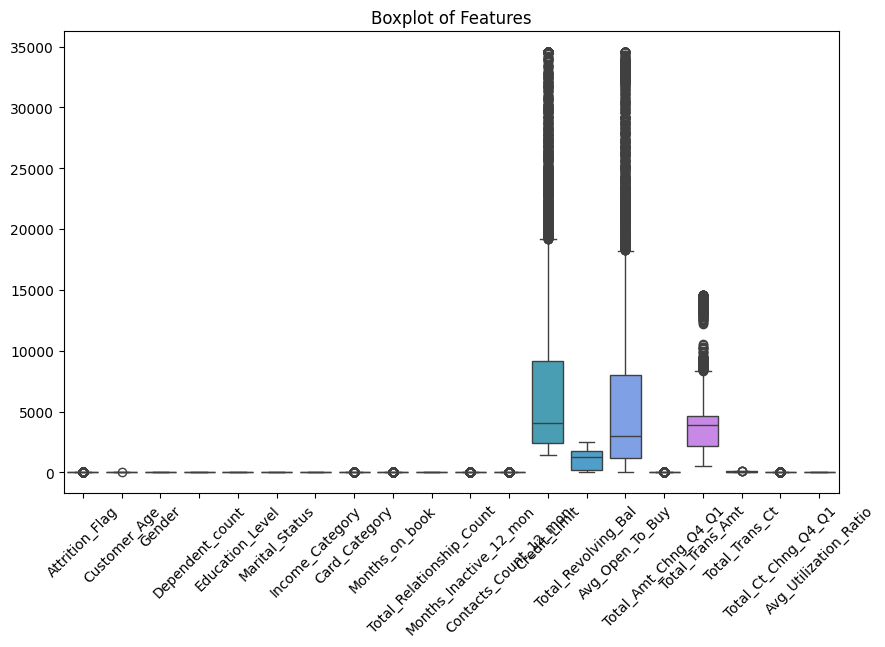

In [ ]:
# Check for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

<Axes: >

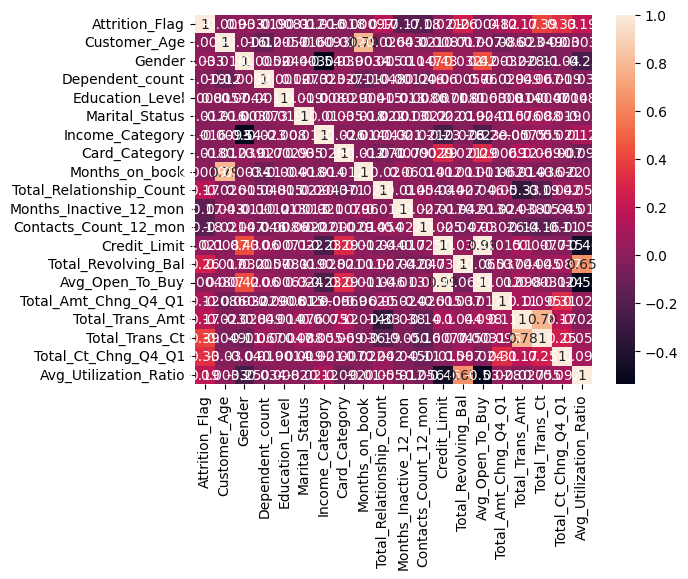

In [ ]:
corr=df1.corr()
sns.heatmap(corr,annot=True)

In [ ]:

# Split the dataset into features (X) and target variable (Y)
X = df1.drop('Attrition_Flag', axis=1)
Y = df1['Attrition_Flag']


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Instantiate the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
# Train the classifier
classifier.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 1 ... 1 0 1]


In [ ]:


# Predict Output for a sample
sample_index = 0  # Choose any index from the test set
sample_features = X_test_scaled[sample_index].reshape(1, -1)  # Reshape the sample for prediction

predicted = classifier.predict(sample_features)

print("Sample Index:", sample_index)
print("Actual Value:", Y_test.iloc[sample_index])
print("Predicted Value:", predicted[0])



Sample Index: 0
Actual Value: 1
Predicted Value: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[ 113  193]
 [ 434 1029]]


In [ ]:
accuray = accuracy_score(y_pred, Y_test)
print(accuray)

0.6455624646693047


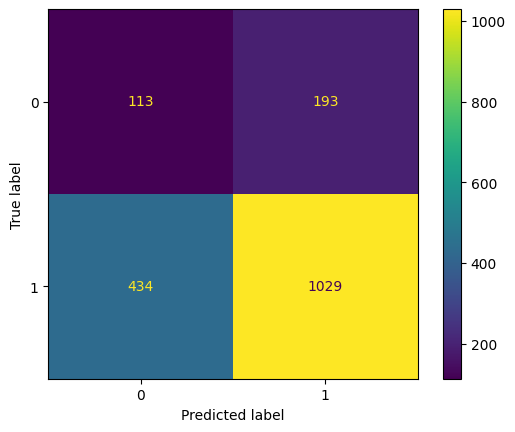

In [ ]:
labels = [0,1]
cm = confusion_matrix(Y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();


In [ ]:
# Classification Report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.37      0.26       306
           1       0.84      0.70      0.77      1463

    accuracy                           0.65      1769
   macro avg       0.52      0.54      0.52      1769
weighted avg       0.73      0.65      0.68      1769

